In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score




In [13]:
# Load preprocessed arrays
X_train = np.load("../data/X_train_scaled.npy")
X_test = np.load("../data/X_test_scaled.npy")
y_train = np.load("../data/y_train.npy")
y_test = np.load("../data/y_test.npy")

print("Data loaded successfully!")
print("X_train shape:", X_train.shape)


Data loaded successfully!
X_train shape: (6400, 11)


In [14]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

print("Random Forest trained successfully!")


Random Forest trained successfully!


In [15]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]


In [16]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Random Forest Results")
print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Random Forest Results
Accuracy: 0.736875
ROC-AUC: 0.5159896864383997

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1186
           1       0.18      0.00      0.01       414

    accuracy                           0.74      1600
   macro avg       0.46      0.50      0.43      1600
weighted avg       0.60      0.74      0.63      1600



In [17]:
with open("../results/metrics.txt", "a") as f:
    f.write("\n\nRandom Forest Results\n")
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"ROC-AUC: {roc_auc}\n")
    f.write(classification_report(y_test, y_pred))

print("Metrics saved to results/metrics.txt")


Metrics saved to results/metrics.txt


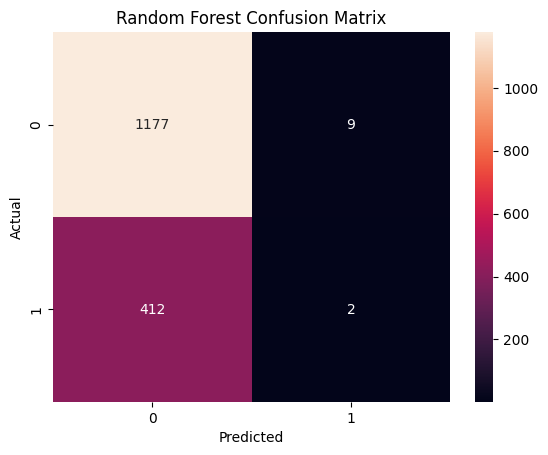

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("../results/plots/confusion_matrix_rf.png", dpi=300, bbox_inches='tight')
plt.show()


In [19]:
import pandas as pd

df = pd.read_csv("../data/spotify_churn.csv")

# Drop target column
X_original = df.drop("is_churned", axis=1)

feature_names = X_original.columns


In [20]:
importances = rf.feature_importances_

fi = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

fi.head(10)


,Feature,Importance
0,user_id,0.173612
5,listening_time,0.163113
6,songs_played_per_day,0.147200
7,skip_rate,0.141666
2,age,0.133043
3,country,0.073347
9,ads_listened_per_week,0.042678
1,gender,0.040043
4,subscription_type,0.038444
8,device_type,0.037445


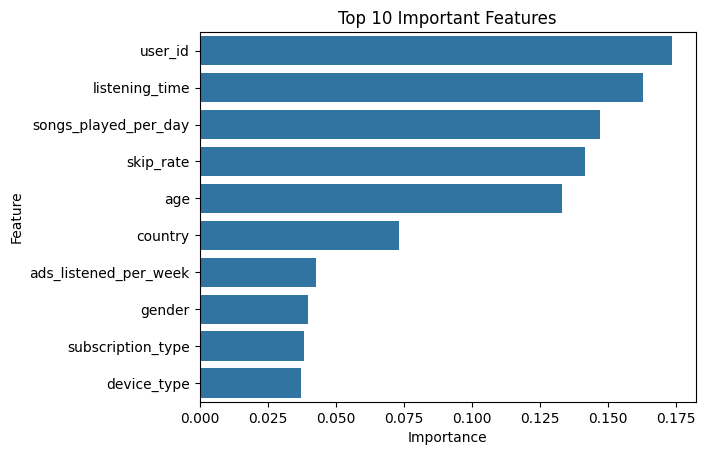

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.barplot(x="Importance", y="Feature", data=fi.head(10))
plt.title("Top 10 Important Features")
plt.savefig("../results/plots/top_10_important_features.png", dpi=300, bbox_inches='tight')
plt.show()
